## Introduction

The purpose of this notebook is to compare the rates of precipitation of all kinds in Seattle and New York City. In this project I will take the average of precipitation across all of the weather stations in our data per city to get a read on the precipitation across the city to analyze the patterns seen. We want to get an idea of which city is truly the rainier city.

Seattle data set: https://github.com/nitschels/Seattle-Weather/raw/main/seattle_rain.csv

New York data set: https://github.com/nitschels/Seattle-Weather/raw/main/ny_rain.csv

Combined average data set: https://github.com/nitschels/Seattle-Weather/raw/main/SEA_NY_WEATHER.csv

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno
import altair as alt

## Load clean data

##### $\rightarrow$ Load the clean data set from Github.

In [2]:
df = pd.read_csv('https://github.com/nitschels/Seattle-Weather/raw/main/SEA_NY_WEATHER.csv')

In [3]:
df.dtypes

Unnamed: 0         int64
date              object
city              object
precipitation    float64
dtype: object

In [4]:
df["date"] = pd.to_datetime(df["date"])

##### $\rightarrow$ Review the contents of the data set.

In [5]:
df

,Unnamed: 0,date,city,precipitation
0,0,2020-01-01,SEA,0.162500
1,1,2020-01-02,SEA,0.181250
2,2,2020-01-03,SEA,0.267500
3,3,2020-01-04,SEA,0.172000
4,4,2020-01-05,SEA,0.168571
...,...,...,...,...
2917,2917,2023-12-27,NYC,0.051538
2918,2918,2023-12-28,NYC,1.845000
2919,2919,2023-12-29,NYC,0.103571
2920,2920,2023-12-30,NYC,0.006429


In [6]:
# And add the month and year
df['month'] = pd.DatetimeIndex(df['date']).month
df["year"] = df["date"].dt.year
df.loc[df['month']==1, 'month'] = 'Jan'
df.loc[df['month']==2, 'month'] = 'Feb'
df.loc[df['month']==3, 'month'] = 'Mar'
df.loc[df['month']==4, 'month'] = 'Apr'
df.loc[df['month']==5, 'month'] = 'May'
df.loc[df['month']==6, 'month'] = 'Jun'
df.loc[df['month']==7, 'month'] = 'Jul'
df.loc[df['month']==8, 'month'] = 'Aug'
df.loc[df['month']==9, 'month'] = 'Sep'
df.loc[df['month']==10, 'month'] = 'Oct'
df.loc[df['month']==11, 'month'] = 'Nov'
df.loc[df['month']==12, 'month'] = 'Dec'

In [7]:
df

,Unnamed: 0,date,city,precipitation,month,year
0,0,2020-01-01,SEA,0.162500,Jan,2020
1,1,2020-01-02,SEA,0.181250,Jan,2020
2,2,2020-01-03,SEA,0.267500,Jan,2020
3,3,2020-01-04,SEA,0.172000,Jan,2020
4,4,2020-01-05,SEA,0.168571,Jan,2020
...,...,...,...,...,...,...
2917,2917,2023-12-27,NYC,0.051538,Dec,2023
2918,2918,2023-12-28,NYC,1.845000,Dec,2023
2919,2919,2023-12-29,NYC,0.103571,Dec,2023
2920,2920,2023-12-30,NYC,0.006429,Dec,2023


## State your questions

The overall problem is to compare how much it rains in Seattle and New York City. To answer this general problem, you will need to ask specific questions about the data.


##### $\rightarrow$ List your questions about the data that will help you solve the problem.

-What months are the best to be in each city if you want to be in a dryer climate?

-What is the difference in heavy rain versus light rain days

-Is there a difference in total rainy days

## Analysis

Perform analyses necessary to answer the questions. You will likely start by trying many things, some of which are useful and some of which are not. Don't be afraid to try different analyses at first. You will edit your notebook to a clean version that retains only the essential components at the end of the project.

We will first plot a line chart just to see the inches of rainfall by day.

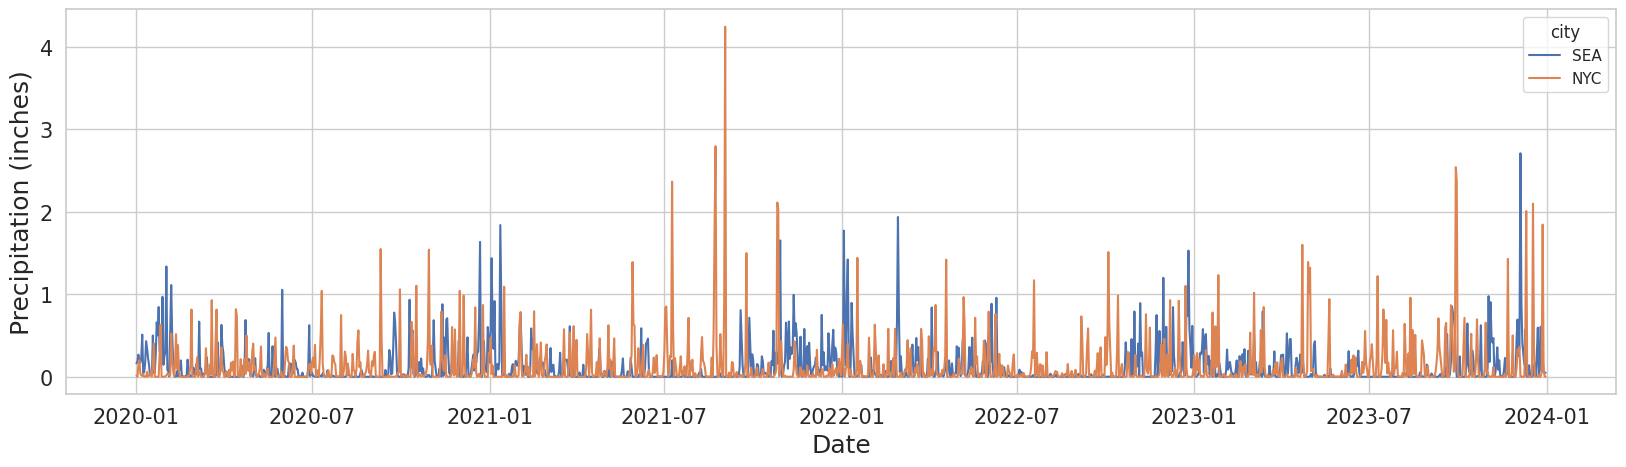

In [8]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

As we can see, Seattle has very litle rainfall on average during June and July, and has more during the fall and winter months. Plotting a line chart with error bars can show us how much the rain varies by month, but the error bars show us how much these can vary. We have larger ones for this simply because we don't have too much data.

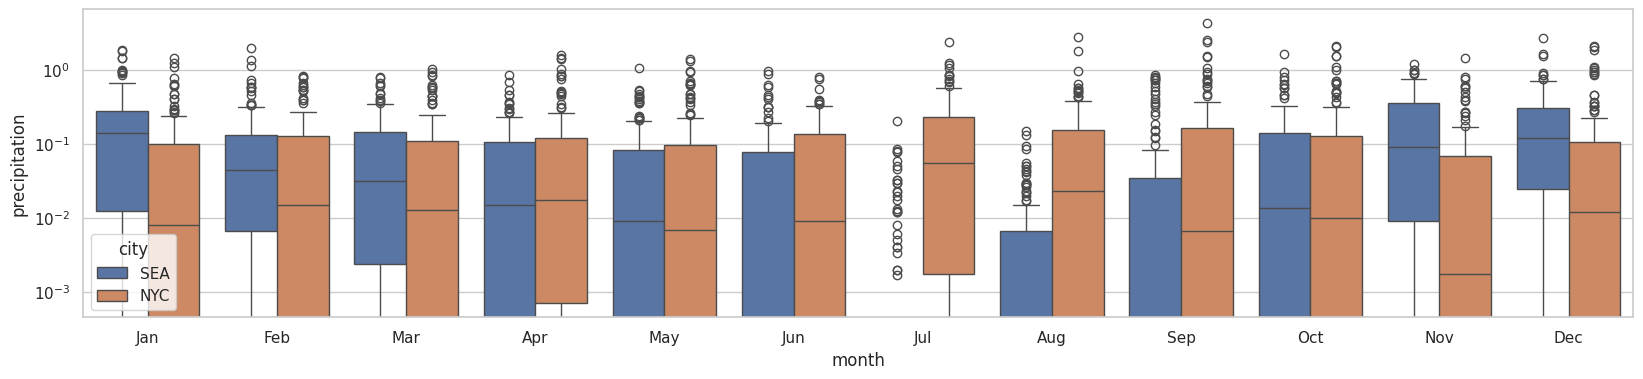

In [10]:
plt.figure(figsize=(20,4))

sns.boxplot(data = df, x = 'month', y = 'precipitation', hue='city');
plt.yscale("log")

The same information is reflected in the box-whisker plot with our data as is shown in the line plot.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'log(rain)')

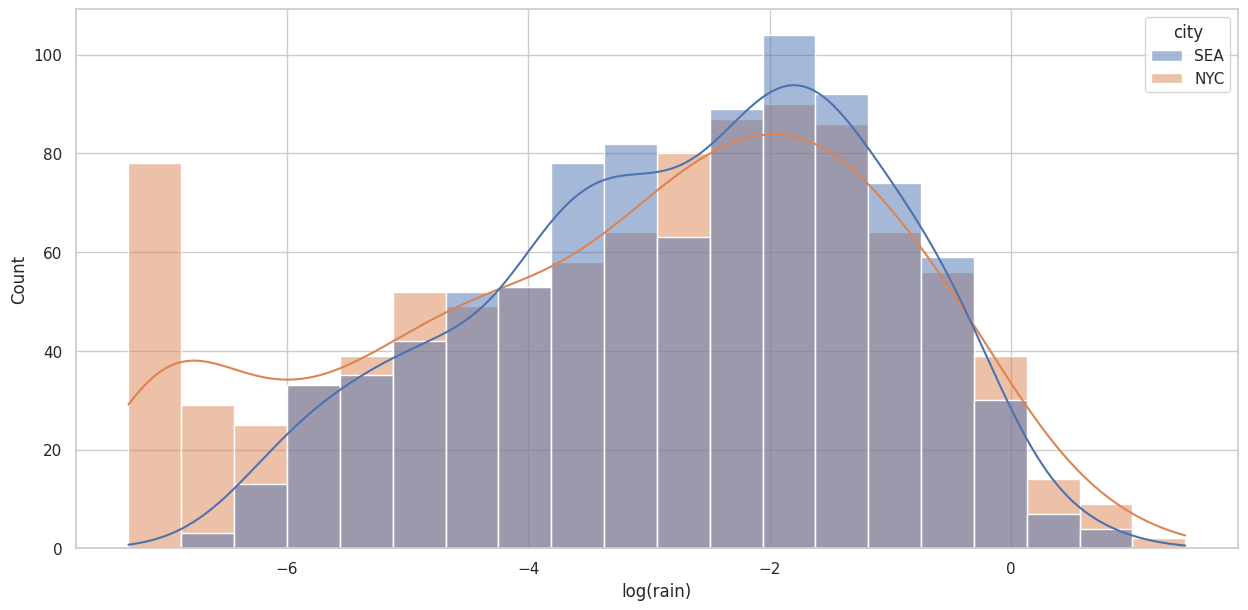

In [11]:
df["log_precip"] = np.log(df["precipitation"])
plt.figure(figsize=(15, 7))
h = sns.histplot(data=df, x="log_precip", hue="city", bins="auto", kde=True)
plt.xlabel("log(rain)")

We see a similar idea as in the previous two charts when looking at the log(rain) function. The log transform of our data is used here since it gives us  cleaner look at what is going on since the data is heavily skewed to the left (more data <1 than >1 inch of rain).

### Results for communication assignment

Now to analyze the questions asked, we will look specifically at days when heavy rain occurred (days with >1 inch of rain)

In [13]:
heavyrain = df[df.precipitation > 1]

alt.Chart(heavyrain).mark_bar().encode(
    x='city:O',
    y='count(precipitation)',
    color='city',
    column='year:N'
)

alt.Chart(...)

As we can see, New York ranks much higher in this metric, which could have been inferred from the data before.

In [14]:
alt.Chart(df).mark_bar().encode(
    x='city:O',
    y='sum(precipitation)',
    color='city',
    column='year:N'
)

alt.Chart(...)

Now if we look at the total rainfall by year, we see a similar pattern with New York having a visually significant amount more of rain in two of the years in our data set.

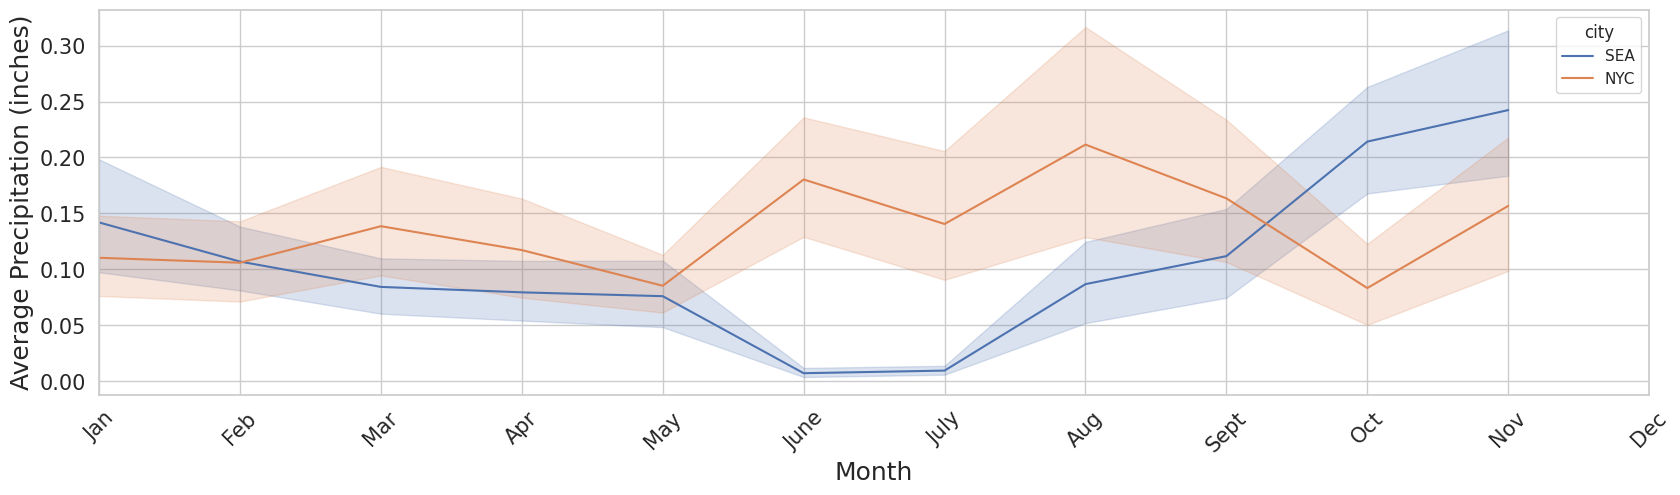

In [30]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='month', y='precipitation', hue='city', errorbar="ci")

plt.xlabel('Month', fontsize=18)
plt.ylabel('Average Precipitation (inches)', fontsize=18)

plt.xticks(ticks=np.arange(12)+1, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.xlim(1,12)

plt.tick_params(labelsize=15);

This plot with the error bars added gives us a better idea as to which months each city gets rainfall and which months don't. There is a spike in the summer in New York with wide error bars, possibly due to the realatively small amount of data we have (only 4 years of data). Seattle in these same summer months has significantly less rainfall than in New York.

For this plot we will look at days with more than neglegable rainfall, which I said to be 0.01 inches of rain. This will give us a better idea for the total amount of rain, since there could be some weather stations in our data that had rain on a certain days when others didn't have any.

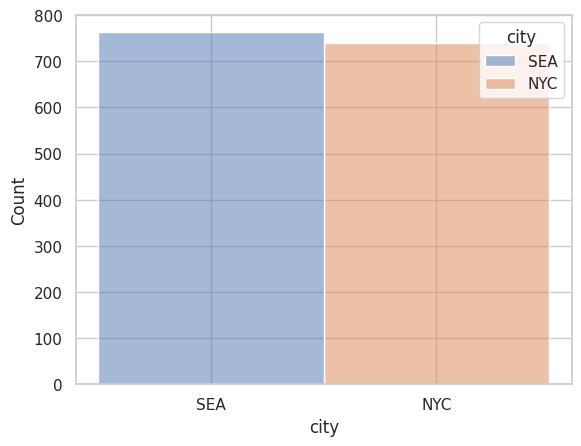

In [28]:
rain = df[df.precipitation > 0.01]
hist = sns.histplot(data=rain, x="city", hue="city", bins="auto", kde=True)

We can see from this data that Seattle has slightly more days of Rain than New York.

In [17]:
alt.Chart(rain).mark_line().encode(
    alt.X('month:N', sort = None),
    alt.Y('count(precipitation)'),
    alt.Color('city'),
    alt.Column('year')
)

alt.Chart(...)

Looking at this plot where I chose to look at the rainfall by month by year, we see that the data stays realatively consistent for both cities. I chose to add this to see if there were any months that significantly differ from other years to see if the data remained consistent.

This file should clearly produce the graphs, tables, models, etc that appear in the communication assignment.

## Conclusion

Provide a brief description of your conclusions.

In conclusion, the data shows that months in the summer are more consistently dryer in Seattle than in New York. We see that on average, Seattle has an average rainfall of .10 inches or below between June and September anually, having average rainfall of approximately .01 inches in July and August. Comparing this to New York, we see an average daily rainfall above 0.10 inches for all 4 of the months mentioned, bar June which is slightly below the mark.

When we look at the histogram for heavy rain days per year, we see that New York has far more than Seattle does. In the four years of records we have, New York has more days where it rained more than one inch in three out of the four years we have in our records. Furthermore, the 2023 data has a total of 13 days of heavy rain in New York, which is only one less than the total heavy rain days in Seattle. Although this may be an outlier in our data, this speaks to the frequency of storms that can occur in New York, and the lack of which that happen in Seattle.

Finally when looking at the count of total rainy days, we see that New York and Seattle only differ very slightly in days with negligible rain (0.01 inches or less of rain). Across all of our records, we see that Seattle has around 50 days fewer than New York in this category, despite the conception that Seattle doesn't have sunny days.